<p><strong>Analyzing The Office Series Data with Python</strong> 
   -R.A.P-


<strong>Introduction:<strong>


<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    

<strong>The Office Popularity, Quality, and Guest Appearances <strong>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
office= pd.read_csv('C:/Users/LENOVO/Documents/Profile/the_office_series.csv')
office_df=office.fillna('-')
guest_stars=[]
for ind,row in office_df.iterrows():
    if row['GuestStars']=='-':
        guest_stars.append('No')
    else:
        guest_stars.append('Yes')
office_df['Has Guest']=guest_stars
office_df.head()
        

,Episode Number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Has Guest
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,-,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,No
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,-,Ken Kwapis,B. J. Novak,No
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,-,Ken Whittingham,Paul Lieberstein,No
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,-,Bryan Gordon,Michael Schur,No
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,-,Greg Daniels,Greg Daniels,No


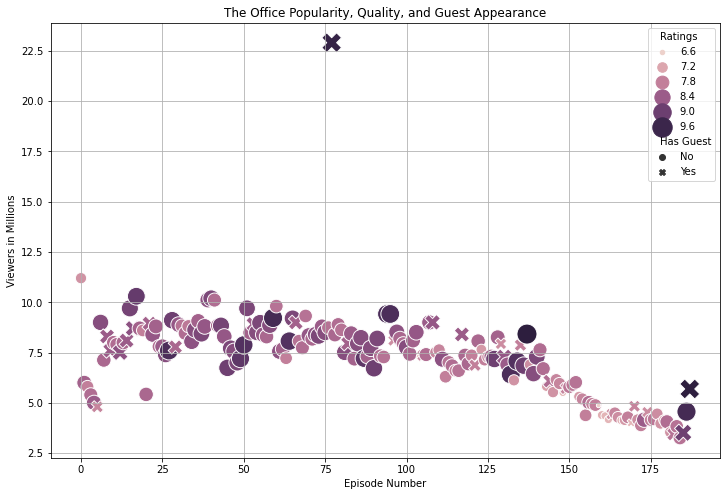

,Episode Number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,Has Guest
77,77,5,Stress Relief,Dwight's too-realistic fire alarm gives Stanle...,9.7,8170,22.91,60,1 February 2009,"Cloris Leachman, Jack Black, Jessica Alba",Jeffrey Blitz,Paul Lieberstein,Yes


In [149]:
##Visualizing the viewership data in accordance to Episode Number, classified by ratings and the appearance of guest
sns.scatterplot(x='Episode Number',y='Viewership',style='Has Guest',hue='Ratings',size='Ratings',sizes=(20,400),data=office_df)
plt.gcf().set_size_inches(12,8)
plt.ylabel('Viewers in Millions')
plt.title('The Office Popularity, Quality, and Guest Appearance')
plt.grid(True)
plt.show()
office_df[office_df['Viewership']==office_df['Viewership'].max()]

The scatterplot shows the viewership number throughout the season which saturated as the rating goes up and is differentiated by marker X for guest and O for without guest episode. The plot shows that the popularity of the show was slowly decreasing. Even so, one episode has the most distinguishable viewers numbers, peaking at 22.91 on 1 February 2009. It turns out that the episode was aired after the Super Bowl 2009.

<strong> The Overall Ratings Trend <strong>

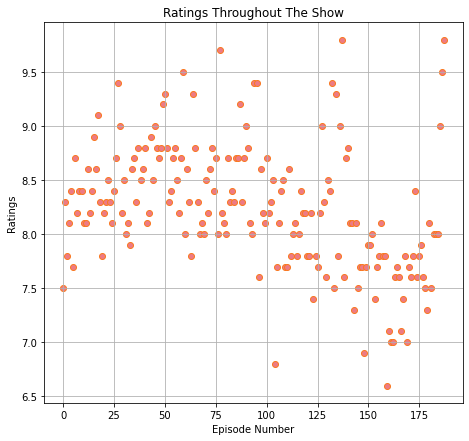

In [150]:
x1= office_df.loc[:,['Episode Number']].values#transforming the dataframe object to 1D array
y1= office_df.loc[:,['Ratings']].values
plt.scatter(x1, y1, color='#ed7b84',edgecolors='#fa7921') # plotting the observation line
z=np.polyfit(x1,y1,1)
p=np.poly1d(z)
plt.plot(x1,p)
plt.gcf().set_size_inches(7.5,7)
plt.grid(True)
plt.title("Ratings Throughout The Show") # stating the title of the graph
plt.xlabel("Episode Number") # adding the name of x-axis
plt.ylabel('Ratings') # adding the name of y-axis
plt.show() # specifies end of graph

Through the plot, it can be seen that the rating also has a downward trend as the episode number goes up. Then, we will analyze the impact that viewership and votes have on ratings. This is because for some shows, the number of views and votes does not guarantee a high rating. That is why we will analyze the relationship between these variables, either they are significant to each other or not, and directly or indirectly proportional.


<strong>Analyzing The Relation between Number of Viewers, Votes, and Ratings using Multiple Regression Analysis<strong>

In [6]:

##Viewership will be set as the dependent variable
x=np.column_stack((office_df['Viewership'],office_df['Votes']))
y=office_df['Ratings']
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)
##Printing the regression model
print('The linear model is Y = {:.5} + {:.5} X1 + {:.5} X2 '. format(reg.intercept_,reg.coef_[0],reg.coef_[1]))
print('******************************************************************************')
x3= sm.add_constant(x)
est=sm.OLS(y,x3)
est2=est.fit()
print(est2.summary())


The linear model is Y = 6.9026 + 0.066631 X1 + 0.00030011 X2 
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     80.44
Date:                Thu, 11 Mar 2021   Prob (F-statistic):           7.29e-26
Time:                        22:42:01   Log-Likelihood:                -108.22
No. Observations:                 188   AIC:                             222.4
Df Residuals:                     185   BIC:                             232.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025   

From the OLS summary, it is known that the R-Squared (Coefficient of Determination) is 0.465 giving us that 46.5% of the data fit the regression model. Furthermore, the obtained p-values of viewers and votes are below 0.05 which show that the Viewership and Votes variables are significant to the change of ratings

<strong> Graphing The Regression Analysis <strong>

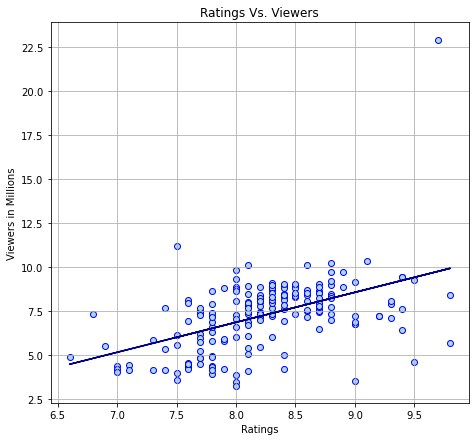

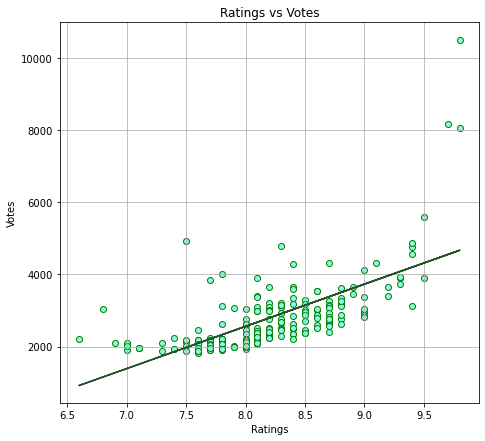

In [104]:
x1= office_df.loc[:,['Ratings']].values #transforming the dataframe object to 1D array
y1= office_df.loc[:,['Viewership']].values
reg = LinearRegression()
reg.fit(x1,y1)
plt.scatter(x1, y1, color='lightblue',edgecolors='blue') # plotting the observation line
plt.plot(x1, reg.predict(x1), color='darkblue') # plotting the regression line
plt.gcf().set_size_inches(7.5,7)
plt.grid(True)
plt.title("Ratings Vs. Viewers") # stating the title of the graph
plt.xlabel("Ratings") # adding the name of x-axis
plt.ylabel('Viewers in Millions') # adding the name of y-axis
plt.show() # specifies end of graph
####################################
x2= office_df.loc[:,['Ratings']].values
y1= office_df.loc[:,['Votes']].values
reg = LinearRegression()
reg.fit(x2,y1)
plt.scatter(x2, y1, color='#8ef9e3',edgecolors='green') 
plt.gcf().set_size_inches(7.5,7)
plt.grid(True)
plt.plot(x2, reg.predict(x2), color='#26532b') 
plt.title("Ratings vs Votes")
plt.xlabel("Ratings") 
plt.ylabel('Votes') 
plt.show()

It can be seen that the distribution of the datas are spread outside the linear model which assures us that we can predict the ratings either with viewership, votes, or both. Moreover, the rating is directly proportional with the number of views and votes.

<strong> The Most Outstanding Directors and Writers <strong>

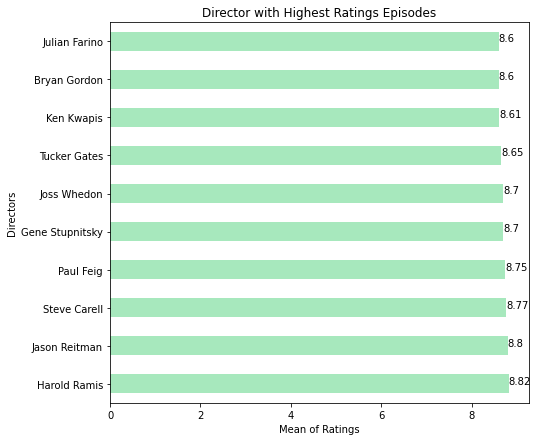

In [105]:
dr=round(office_df.groupby('Director')['Ratings'].mean(),2) ##creating dataframe only for Director and Ratings variables
drn=dr.nlargest(10) ##selecting The Top 10 Director 
drn.plot(kind='barh',color='#a7e8bd')
plt.gcf().set_size_inches(7.5,7)
for i,v in enumerate(drn):
    plt.text(v,i,str(v),color='black')
plt.ylabel('Directors')
plt.xlabel('Mean of Ratings')
plt.title('Director with Highest Ratings Episodes')
plt.show()


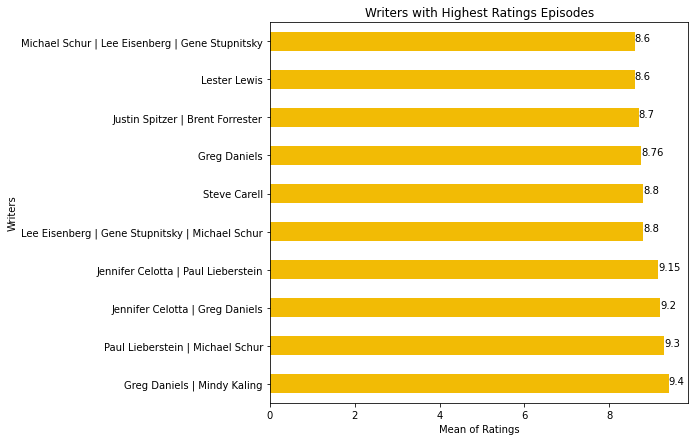

In [109]:
dr=round(office_df.groupby('Writers')['Ratings'].mean(),2) ##creating dataframe only for Director and Ratings variables
drn=dr.nlargest(10) ##selecting The Top 10 Director 
drn.plot(kind='barh',color='#f2bb05')
plt.gcf().set_size_inches(7.5,7)
for i,v in enumerate(drn):
    plt.text(v,i,str(v),color='black')
plt.ylabel('Writers')
plt.xlabel('Mean of Ratings')
plt.title('Writers with Highest Ratings Episodes')
plt.show()

The popularity and quality of a show are also the result of the hard work from people behind the scenes. In here, the bar chart shows the top 10 directors and writers whose overall production ratings are higher than others.

<strong> Conclusion: <strong>

The popularity and quality of the show was slowly decreasing throughout the show, starting at 11.2 million views to only 5.69 mil views. In The Office, the number of views and votes are significant to the ratings variable which means that we can predict future ratings with these two variables data. Another observation is that the show managed to double its pilot ratings only on 1 February 2009, with the help of the Super Bowl show which means that the popularity of the show is also affected by external factors